# DS-GA 3001.009 Modeling Time Series Data
# Week 2 ACF, CCF and ARMA

functions and packages needed

In [1]:
# Install statsmodels
# conda install -c conda-forge statsmodels
import statsmodels
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
# statsmodels.graphics.tsaplots doesn't have plotting function for CCF so I have to write my own.
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, **kwargs)
    return fig

## Part I:  Autocorrelation Function

### A) implement ACF
Do your own implementation of the ACF function. Your implementation will be checked against statsmodels.tsa.stattools.acf.

In [3]:
def acf_impl(x, nlags):
    """
    TODO
    @param x: a 1-d numpy array (data)
    @param nlags: an integer indicating how far back to compute the ACF
    @return a 1-d numpy array with (nlags+1) elements. 
            Where the first element denotes the acf at lag = 0 (1.0 by definition).
    """
    #TODO: replace the template code with your code here. This part will be graded.
    def r(x, y):
        return np.mean((x - x.mean()) * (y - y.mean())) / (x.std() * y.std())
    return np.array([1] + [r(x[:-i], x[i:]) for i in range(1, lag)])

#    return np.zeros(nlags+1)

### B) ACF of White Noise 

$$w_t \sim N(0, \sigma^2)$$

- Set $\sigma$ = 1, sample n = 500 points from the process above
- Plot the white noise
- Plot the sample ACF up to lag = 20.
- Calculate the analytical ACF and compare it with the sample ACF.
- What trend/observation can you find in the ACF plot?
- Change n to 50, compare the new ACF plot (n=50) to the old ACF plot (n=500). What causes the difference?

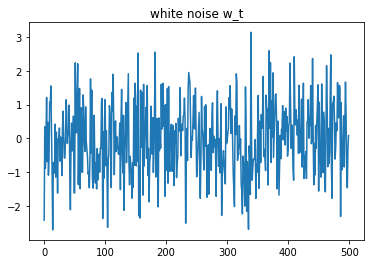

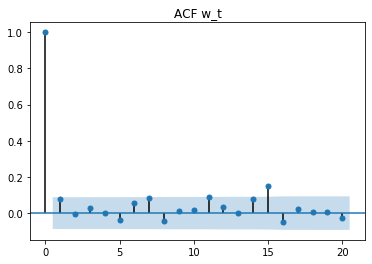

Text(0.5, 1.0, 'your ACF impl against statsmodels')

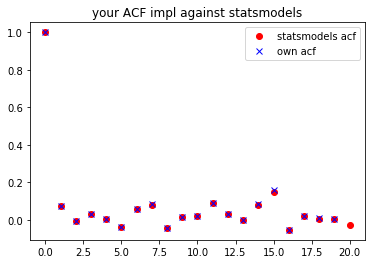

In [4]:
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n)
# plot white noise
plt.plot(w_t)
plt.title("white noise w_t")
plt.show()

# calculate acf
acf_val = acf(x=w_t, nlags=lag, fft=True)
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=w_t, nlags=lag)

#print(acf_val)
#print(acf_val_impl)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.title('your ACF impl against statsmodels')

### C) ACF of Moving Average 

$$v_t = \frac{1}{3}(w_{t}+ w_{t+1}+ w_{t+2})$$

- Sample n+2 white noise from N(0,1)
- Add code to compute the moving average $v_t$.
- Plot both $w_t$ and $v_t$ and compare the two time series.
- Derive the analytical ACF
- Plot the sample/empirical ACF of $v_t$ and compare it with the analytical ACF.

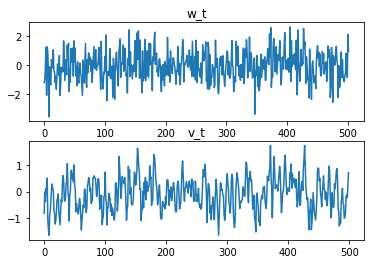

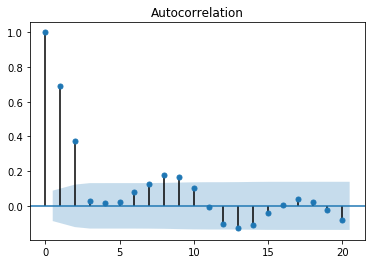

Text(0.5, 1.0, 'your ACF impl against statsmodels')

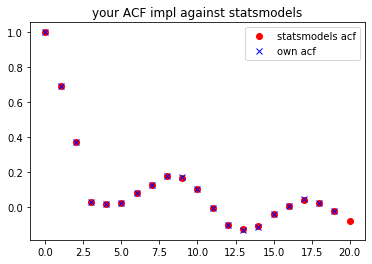

In [5]:
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n+2)
# create moving average
#TODO: replace the template code with your code here. This part will be graded.

def moving_average(x, h=3):
    def add_range(x, i, h):
        return 1/h * x[i:i+h].sum()
    n = x.size
    assert h <= n
    return np.array([add_range(x, i, h) for i in range(n-h+1)])

v_t = moving_average(w_t)
#v_t = np.zeros(len(w_t))  

# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.title("w_t")

# plot moving average
plt.subplot(212)
plt.plot(v_t)
plt.title("v_t")

# calculate acf
acf_val = acf(x=v_t, nlags=lag, fft=True)
plot_acf(x=v_t, lags=lag)
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.title('your ACF impl against statsmodels')

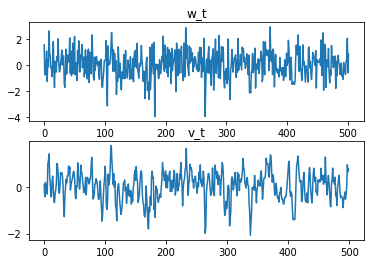

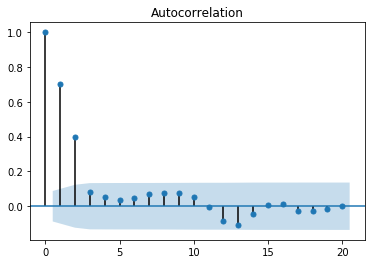

Text(0.5, 1.0, 'your ACF impl against statsmodels')

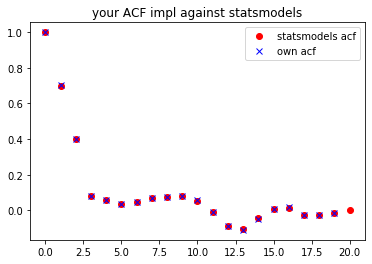

In [10]:
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n+2)
# create moving average
#TODO: replace the template code with your code here. This part will be graded.

def moving_average(x, h=2):
    def add_range(x, i, h):
        return (1./3.) * (x[i:i+h+1].sum()
    n = x.size
    assert h < n
    return np.array([add_range(x, i, h) for i in range(n-h)])

                          x
v_t = moving_average(w_t, h=3)
#assert v_t.size == w_t.size - 3
v_t = moving_average(w_t)
#v_t = np.zeros(len(w_t))  

# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.title("w_t")

# plot moving average
plt.subplot(212)
plt.plot(v_t)
plt.title("v_t")

# calculate acf
acf_val = acf(x=v_t, nlags=lag, fft=True)
plot_acf(x=v_t, lags=lag)
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.title('your ACF impl against statsmodels')

### D) ACF of signal in noise 

$$v_t = 2 cos(\frac{2\pi t}{50} + 0.6\pi) + w_t$$

- Sample white noise of length n from $N(0,1)$
- Add code to compute $v_t$.
- Plot both $w_t$ and $v_t$. Compare the two plots.
- Plot the sample ACF of $v_t$. What's the pattern? What causes the observed pattern?

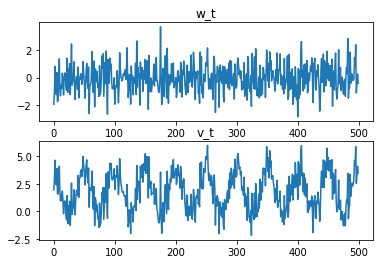

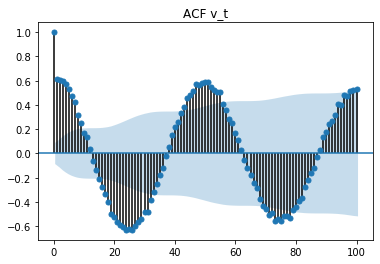

Text(0.5, 1.0, 'your ACF impl against statsmodels')

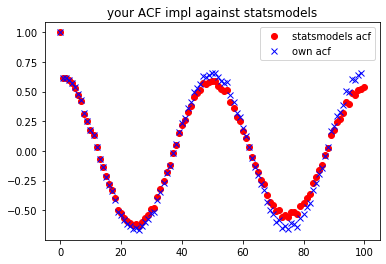

In [14]:
n = 500
mean = 0
std = 1 
lag = 100

# create white noise
w_t = np.random.normal(mean, std, size=n)
# create signal w. noise
#TODO: replace the template code with your code here. This part will be graded.
v_t = np.array([(2 * np.cos(np.pi * i/25) + 0.6 * np.pi) + w_t[i] for i in range(w_t.size)])
#v_t = np.zeros(len(w_t))  


# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.title("w_t")
# plot signal with noise
plt.subplot(212)
plt.plot(v_t)
plt.title("v_t")

# plot acf
acf_val = acf(x=v_t, nlags=lag, fft=True)
plot_acf(x=v_t, lags=lag, title="ACF v_t")
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.title('your ACF impl against statsmodels')

## Part II:  Cross-correlation Function

### A) CCF of signal with noise
#### Synthetic Data

$$x_t \sim N(0, \sigma_x^2) $$

$$ y_t = 2x_{t-5} + w_t
w_t \sim N(0, \sigma_x^2)$$

- In this example, we created two processes with a lag of 5.
- Plot both samples and verify the lag.
- Plot the empirical ACF for both samples.
- Plot the empirical CCF. What information can you conclude from the CCF plot?

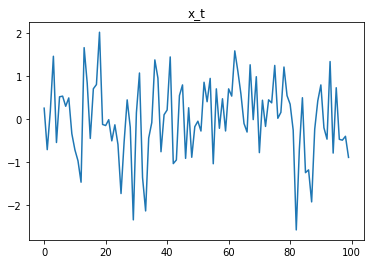

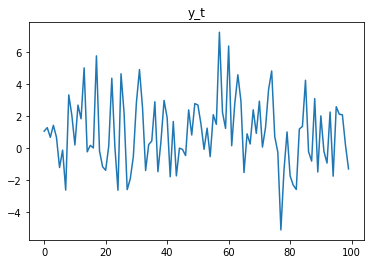

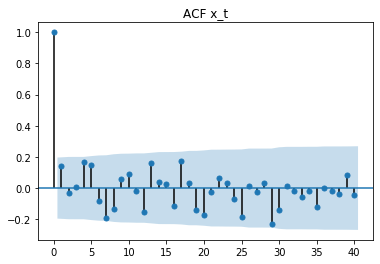

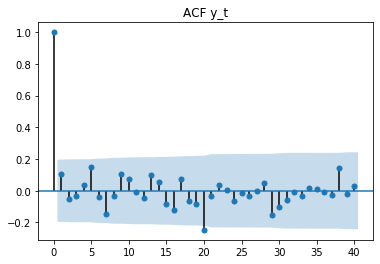

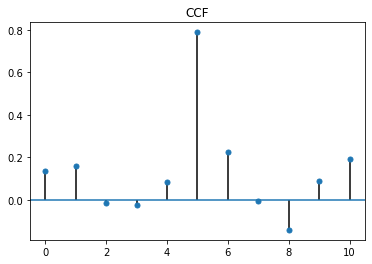

In [16]:
# Cross-correlation synthetic Example
n = 100
mean = 0
std = 1 
lag=40
true_h = 5

w_t = np.random.normal(mean, std, size=n)
x_t = np.random.normal(mean, std, size=n+5)

#TODO: replace the template code with your code here. This part will be graded.
# y_t = 2 * x_t[:n-true_h] + w_t[true_h:] * w_t[true_h:]
# x_t = x_t[:n-true_h]

y_t = 2 * x_t[5:] + w_t * w_t
x_t = x_t[:n]
#y_t = np.zeros(n)

# plot the original data
plt.plot(x_t)
plt.title("x_t")
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.show()

# plot acf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

# plot ccf
ccf_val = ccf(y_t, x_t)
plot_ccf(x_t, y_t, title="CCF", lags=10, vlines_kwargs={})
plt.show()

### B) CCF of data
#### Southern Oscillation Index (SOI) v.s. Recruitment (Rec)

- Replicate the procedure in the previous section.
- What information can you tell from the CCF plot.
- In this example, our procedure is actually flawed. Unlike the previous example, we can not tell if the cross-correlation estimate is significantly different from zero by looking at the CCF. Why is that? What can we do to address this issue?

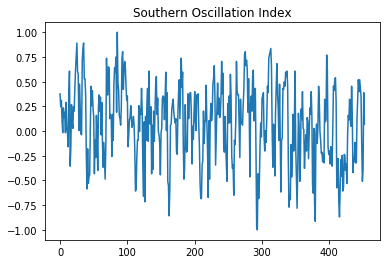

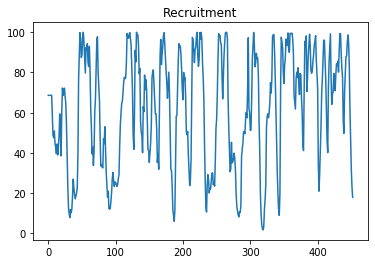

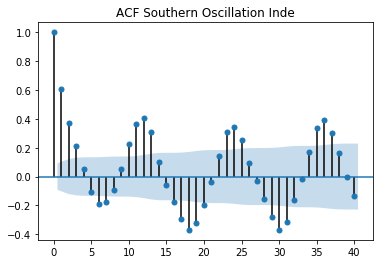

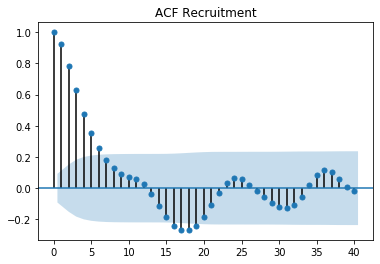

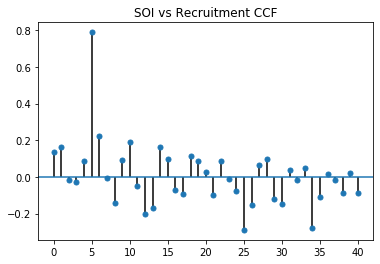

In [17]:
path = 'C:/Users/carol/Documents/GitHub/timeseries2018/data/'
soi = np.array(pd.read_csv("../../data/soi.csv")["x"])
rec = np.array(pd.read_csv("../../data/rec.csv")["x"])

#TODO: This part will be graded.

# plot data
plt.plot(soi)
plt.title("Southern Oscillation Index")
plt.show()
plt.plot(rec)
plt.title("Recruitment")
plt.show()


# plot acf
lag = 40
plot_acf(x=soi, lags=lag, title="ACF Southern Oscillation Inde")
plot_acf(x=rec, lags=lag, title="ACF Recruitment")
plt.show()

# plot ccf
ccf_val = ccf(soi, rec)
plot_ccf(x_t, y_t, title="SOI vs Recruitment CCF", lags=lag, vlines_kwargs={})
plt.show()

## Part III: AR models

In this example, we will fit an AR(p) model to the SunActivity data, which denotes the number of sunspots for each year.

We will determine p, fit the model, compute the roots and the lag 0 to p components of the ACF.

Wikipedia for sunspots: https://en.wikipedia.org/wiki/Sunspot

The code in this section is selected from the tutorial specified in the reference section.

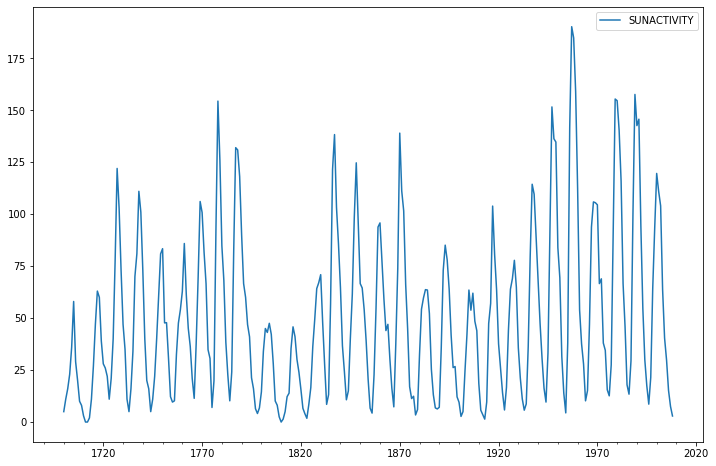

In [18]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(12,8))
plt.show()

#### ACF & PACF

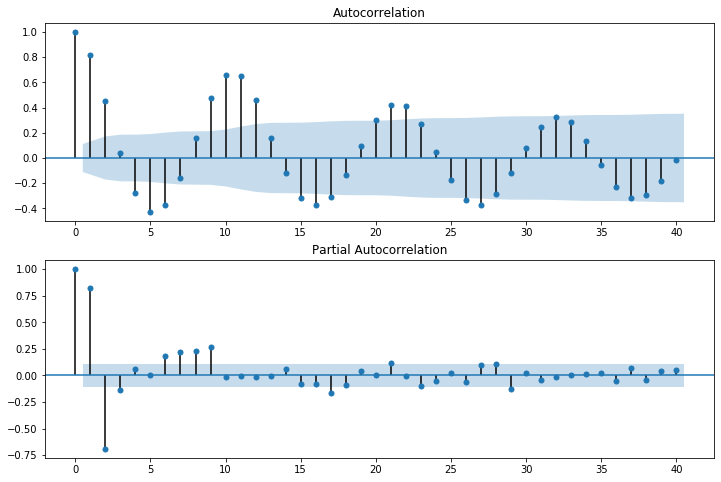

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

#### Fit AR Model of order p


In [21]:
# TODO: chose p appropriately
p = 2

arma_mod = sm.tsa.ARMA(dta, (p,0)).fit(disp=False)
print(len(arma_mod.params))
print(arma_mod.params)
print("ar_roots={}, ma_roots={}".format(arma_mod.arroots, arma_mod.maroots))

acf_val_2 = acf(x=dta, nlags=40, fft=True)
print(acf_val_2)

# TODO: predict ACF of model at lag 0, 1, ..., p
# Equations:
# r_h - phi1 r_{h-1} _phi2 r_{h-2} = 0
# r_{-h} = r_{h}
# r1 - phi1 r0 - phi2 r_{-1} = 0 => r1 = phi1 / (1 - phi2)
# r2 - phi_1 r1 - phi2 r0 = 0 => r2 = ph1^2 / (1 - phi2) + phi2  
phi1= arma_mod.params[1]
phi2= arma_mod.params[2]
print(phi1, phi2)
r1 = phi1/(1-phi2)
r2 = (phi1* phi1) / (1-phi2) + phi2
rho = np.array([1, r1, r2])
print("rho={}".format(rho))
#rho = np.zeros(p+1)
    
# TODO: compute roots
roots = np.roots([-phi2, -phi1, 1])
#roots = np.zeros(2)

print('roots: ', roots)

3
const                49.659374
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64
ar_roots=[1.0098126-0.65769389j 1.0098126+0.65769389j], ma_roots=[]
[ 1.          0.82020129  0.45126849  0.03957655 -0.27579196 -0.42523943
 -0.37659509 -0.15737391  0.15820254  0.47309753  0.65898002  0.65029082
  0.45666254  0.16179329 -0.12205105 -0.3161808  -0.37471125 -0.30605753
 -0.1348069   0.09158727  0.2975632   0.4207074   0.41183954  0.27020758
  0.04496208 -0.17428715 -0.33045026 -0.37287834 -0.28555061 -0.11794414
  0.08293231  0.24897507  0.32752101  0.28335919  0.1375272  -0.05526386
 -0.22973205 -0.31338879 -0.29355684 -0.17897285 -0.01769038]
1.3906556525986968 -0.6885711508196213
rho=[1.         0.82356947 0.45673039]
roots:  [1.0098126+0.65769389j 1.0098126-0.65769389j]


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:13

#### prediction

In [22]:
predict_sunspots = arma_mod.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    164.966799
1991-12-31    135.687495
1992-12-31     89.897500
1993-12-31     46.380270
1994-12-31     17.392456
1995-12-31      7.045099
1996-12-31     12.615660
1997-12-31     27.487284
1998-12-31     44.332865
1999-12-31     57.519095
2000-12-31     64.257220
2001-12-31     64.547974
2002-12-31     60.312634
2003-12-31     54.222530
2004-12-31     48.669625
2005-12-31     45.140916
2006-12-31     44.057268
2007-12-31     44.980053
2008-12-31     47.009499
2009-12-31     49.196355
2010-12-31     50.840102
2011-12-31     51.620181
2012-12-31     51.573167
Freq: A-DEC, dtype: float64


In [33]:
dta.iloc[:-1]

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
1705-12-31,58.0
1706-12-31,29.0
1707-12-31,20.0
1708-12-31,10.0
1709-12-31,8.0


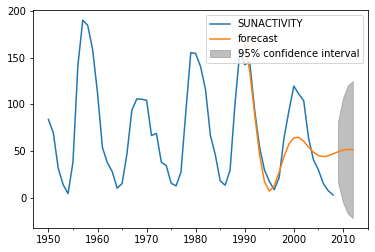

In [44]:
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
fig = arma_mod.plot_predict('1990', '2012', dynamic=True, ax=ax,                        plot_insample=False)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


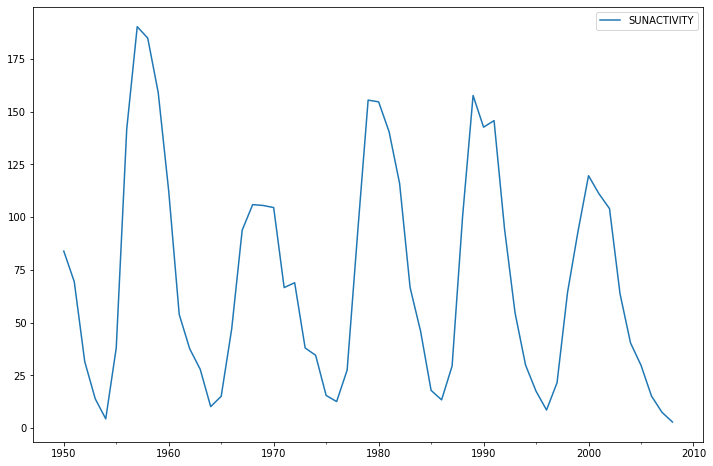

In [40]:
# TODO: try to predict further into the future by increasing tsteps
tsteps=5

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1950':].plot(ax=ax)
#ax = dta.ix['1900':].plot(ax=ax)
T = np.arange(1990, 2017, tsteps)
#T = np.arange(1930, 2010, tsteps)
#for tt in range(len(T)-3):
#    fig = arma_mod.plot_predict(np.str(T[tt]), np.str(T[tt+1]), dynamic=True, ax=ax, plot_insample=False)
#plt.show()

#### plot ACF and PACF

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


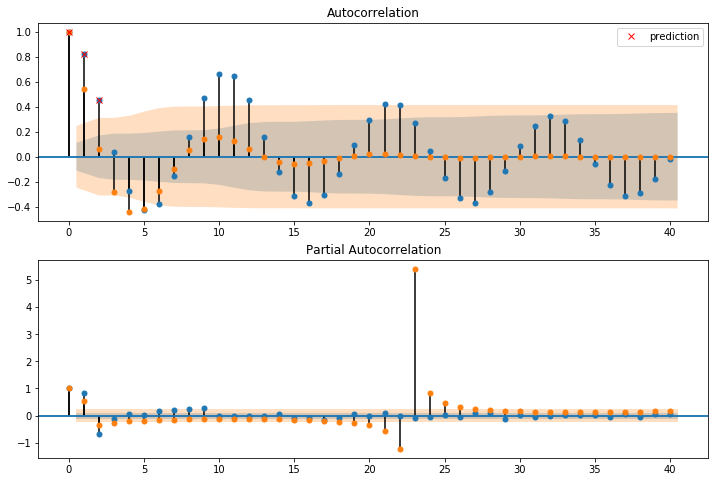

In [24]:
predict_sunspots = arma_mod.predict('1950', '2012', dynamic=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
fig = sm.graphics.tsa.plot_acf(predict_sunspots, lags=40, ax=ax1)
ax1.plot(np.arange(p+1), rho, 'xr', label='prediction')
ax1.legend()
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
fig = sm.graphics.tsa.plot_pacf(predict_sunspots, lags=40, ax=ax2)
plt.show()

## Part IV
### Moving Average

$$x_t = 0.5 x_{t-1} - 0.5 w_{t-1} + w_t$$

$$w_t\sim N(0, \sigma^2)$$

Is $x_t$ same as white noise $w_t$?
Think about ACF.

Then use code below to assess and verify your guess.

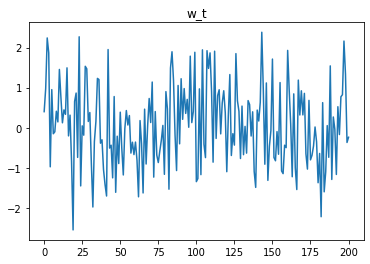

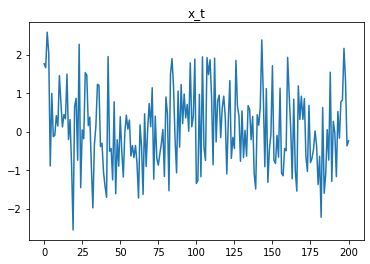

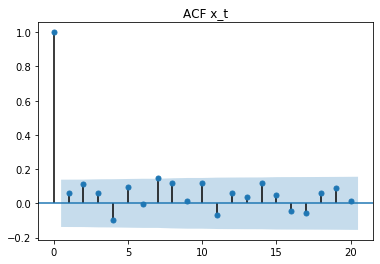

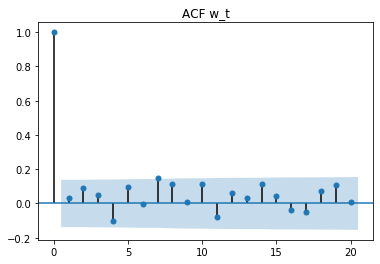

In [25]:
n = 200
mean = 0
std = 1 
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, std, size=n+1) 
for i in range(1, n+1):
    x_t.append(0.5 * x_t[i-1] - 0.5 * w_t[i-1] + w_t[i] )

# plot x_t & w_t
plt.plot(w_t)
plt.title("w_t")
plt.show()
plt.plot(x_t)
plt.title("x_t")
plt.show()

# acf & pacf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.show()

$$x_t = w_t + \frac{1}{5} w_{t-1}, w_t \sim N(0, 25)$$

$$y_t = v_t + 5 v_{t-1}, v_t \sim N(0,1)$$

Are $x_t$ and $y_t$ the same? Think about ACF.

Then use code below to assess and verify your guess.

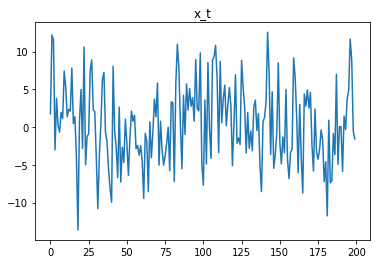

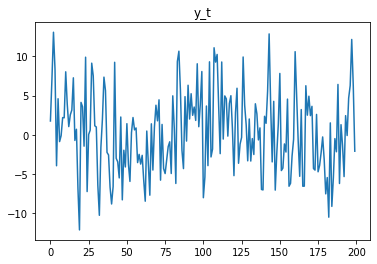

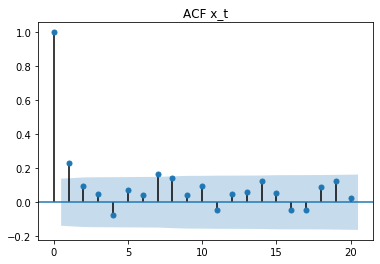

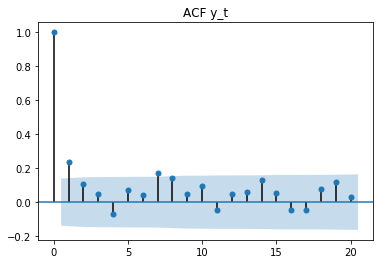

In [26]:
n = 200
mean = 0
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, 5, size=n+1) 
np.random.seed(0)
y_t = list(np.random.normal(mean, std, size=1))
v_t = np.random.normal(mean, 1, size=n+2) 
for i in range(2, n+1):
    x_t.append(w_t[i] + 0.2 * w_t[i-1])
    y_t.append(v_t[i] + 5 * v_t[i-1])

# plot x_t & y_t
plt.plot(x_t)
plt.title("x_t")
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.show()

# acf & pacf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

### Please turn in the code before 09/25/2019 3:00 pm. 

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to these questions in the text blocks. Everything that will be graded is indicated by the "TODO".